In [35]:
import cv2
import numpy as np

image = cv2.imread('images/鈴鹿歌子.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cols = 64
rows = np.round(cols / 2 / image.shape[0] * image.shape[1]).astype(int)
image = cv2.resize(image , (cols,  rows))
stack = []

for pixel in image:
    for  rgb in pixel:
            rgb = np.array([np.round(5 * c / 255).astype(int) for c in rgb])
            color = int(''.join(rgb.astype(str)), 6)   +  16
            stack.append(color)

In [36]:
colors = []

for k, v in enumerate(stack):
    if k != 0 and k % cols == 0:
        colors.append("\n")
    colors.append("\e[38;5;{}m*\e[m".format(v))

In [37]:
with open('tmp.txt', 'wb') as f:
    f.write(''.join(colors).encode('utf-8'))

True

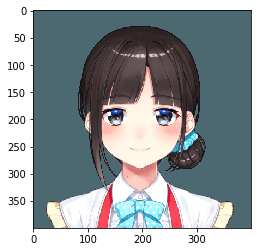

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
image2 = cv2.imread('images/鈴鹿歌子.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
cv2.imwrite('cv.jpg', image2)

In [46]:
import cv2
import numpy as np

class Converter:
    def __init__(self, loadfn: str, size: int):
        tmp = cv2.imread(loadfn)
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        self.cols = size
        self.rows = np.round(size / 2 / tmp.shape[0] * tmp.shape[1]).astype(int)
        self.data = cv2.resize(tmp, (self.cols, self.rows))
        
    def to_base6(self) -> list:
        colors = []
        for pixel in self.data:
            for rgb in pixel:
                rgb = np.array([np.round(5 * c / 255).astype(int) for c in rgb])
                color = int(''.join(rgb.astype(str)), 6) + 16
                colors.append(color)
        return colors
        
    def to_escape_sequences(self, colors: list) -> str:
        sequences = []
        for key, color in enumerate(colors):
            if key != 0 and key % self.cols == 0:
                sequences.append("\n")
            sequences.append("\e[38;5;{}m*\e[m".format(color))
        return ''.join(sequences)


In [49]:
converter = Converter('images/鈴鹿歌子.png', 200)

In [50]:
colors = converter.to_base6()
data = converter.to_escape_sequences(colors)
with open('tmp.txt', 'wb') as f:
    f.write(''.join(data).encode('utf-8'))